<a href="https://colab.research.google.com/github/ShahadAljohani/StudentStudyHrsProject/blob/main/ANNSimpleProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [6]:
dataset = pd.read_csv('simple_ann_dataset.csv')
X = dataset.iloc[:,0:2].values
y = dataset.iloc[:,-1].values

In [8]:
print(X)

[[ 1  8]
 [ 2  7]
 [ 3  6]
 [ 4  5]
 [ 5  5]
 [ 6  4]
 [ 7  4]
 [ 8  3]
 [ 9  3]
 [10  2]]


In [9]:
print(X)

[0 0 0 0 1 1 1 1 1 1]


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [17]:
ann = tf.keras.models.Sequential() #ANN creation
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu')) #input layer
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu')) #Neuron layer
ann.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid')) #output layer

In [18]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])#ANN compiling

In [32]:
history=ann.fit(X_train, y_train, batch_size = 32, epochs = 100)# where the fun begins

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.8750 - loss: 0.2631
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.8750 - loss: 0.2623
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.8750 - loss: 0.2614
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - accuracy: 0.8750 - loss: 0.2606
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.8750 - loss: 0.2598
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.8750 - loss: 0.2589
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.8750 - loss: 0.2581
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.8750 - loss: 0.2573
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.8750 - loss: 0.2565
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.8750 - loss: 0.2557
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.8750 - loss: 0.2549
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.8750 - 

In [33]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
[[0 0]
 [1 1]]


In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1 0]
 [0 1]]


1.0

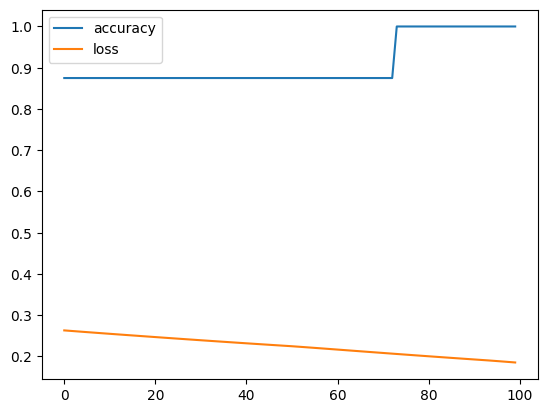

In [37]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['loss'], label='loss')
plt.legend()
plt.show()